# 🌀 Demonstrating Phase Kickback in Quantum Computing with Qiskit

## 🎯 Objective

Demonstrate the **phase kickback** phenomenon in practice, where a controlled phase rotation applied to the **target qubit** affects the **control qubit** — highlighting the **unitary** and **reversible** nature of quantum operations.

## 🧠 Theoretical Context

In classical computing, information flows from **control to target**. In quantum computing, when the control is in **superposition**, the application of a **controlled gate** (such as `CRZ(θ)`) can “reflect” the phase applied to the target back to the control qubit — a phenomenon known as **phase kickback**.

## ⚙️ Overview of the Experiment

1. **Initialize a two-qubit circuit:**
   - The **target qubit** is set to the state $|1⟩$
   - The **control qubit** is prepared in superposition: $ (|0⟩ + |1⟩)/\sqrt{2} $

2. **Apply a controlled phase rotation gate `CRZ(θ)`:**
   - The phase is conditionally applied to the target

3. **Observe the _phase kickback_ effect:**
   - The phase applied to the target “kicks back” and alters the relative phase of the control

4. **Apply a final Hadamard gate to the control qubit:**
   - Converts the phase information into a measurable amplitude difference

5. **Visualize the results through:**
   - **Measurement probabilities**
   - Full **statevector analysis**
   - Bloch sphere representations

## 🚀 Importance of the Phenomenon

The **phase kickback** effect is a core component of several important quantum algorithms, including:

- **Quantum Phase Estimation (QPE)**
- **Shor’s Factoring Algorithm**
- **Quantum simulations** in physics and chemistry

In [1]:
# Libraries
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector

# Enable inline plots (for notebooks)
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 5)

Initial state |00⟩:


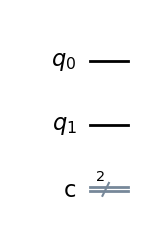

In [2]:
# ===============================================
# Initial state |00>
# ===============================================
print("Initial state |00⟩:")
# Create quantum circuit with 2 qubits and 2 classical registers
qc = QuantumCircuit(2,2)

# Show the circuit
qc.draw('mpl');

## Statevector

The *statevector* completely describes the quantum state of a system.

Each complex number in the vector represents the **probability amplitude** associated with one of the basis states of the 2-qubit system:

$$
|00⟩,\quad |01⟩,\quad |10⟩,\quad |11⟩
$$

The amplitudes determine the chance of collapsing into each state upon measurement.


---

**Statevector Mapping**

| Index | State       | Amplitude       | Probability |
|-------|-------------|-----------------|-------------|
| 0     | $\lvert 00⟩$ | $1.0 + 0.0j$    | 100%        |
| 1     | $\lvert 01⟩$ | $0.0 + 0.0j$    | 0%          |
| 2     | $\lvert 10⟩$ | $0.0 + 0.0j$    | 0%          |
| 3     | $\lvert 11⟩$ | $0.0 + 0.0j$    | 0%          |


In [3]:
# Get the statevector
initial_state = Statevector.from_instruction(qc)

print("Initial statevector:")
print(initial_state)

Initial statevector:
Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))


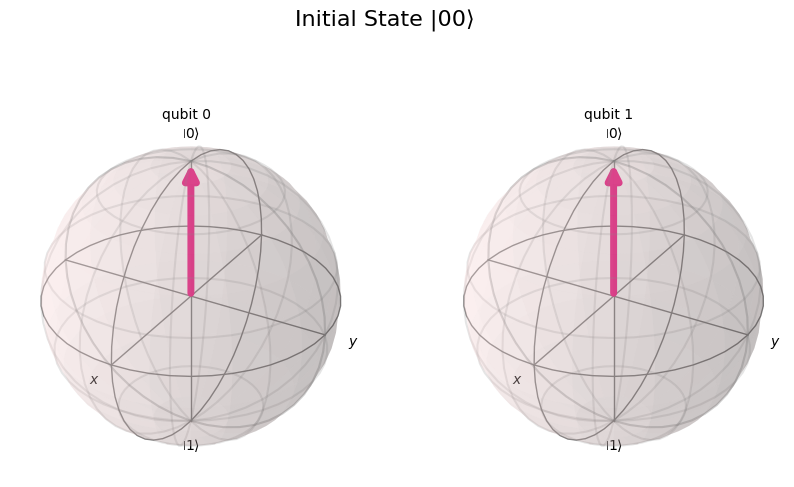

In [4]:
# Show qubit state on the Bloch sphere
plot_bloch_multivector(initial_state, title="Initial State |00⟩");

### Apply H on control and X on target

**Applied Operations:**

- We apply **Hadamard (H)** on the **control qubit** (q₀) → it enters superposition:  
  $$
  |+\rangle = \frac{|0⟩ + |1⟩}{\sqrt{2}}
  $$
- We apply **X** on the **target qubit** (q₁) → it flips the qubit from $|0⟩$ to:
  $$|1⟩$$ 

---

**System State After the H and X Operations:**

The joint state of the system (2 qubits) is:

$$|\psi\rangle_{\text{before}}  =  \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) \otimes |1\rangle  =  \frac{1}{\sqrt{2}}(|0\rangle|1\rangle + |1\rangle|1\rangle)$$ 

Simplifying:

$$
|\psi⟩ = \frac{|0⟩|1⟩ + |1⟩|1⟩}{\sqrt{2}}
$$

---

This means:

- The **control** (q₀) is in superposition.
- The **target** (q₁) is fixed in the state $|1⟩$.

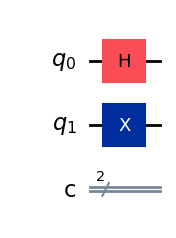

In [5]:
# ===============================================
# Apply H on control and X on target
# ===============================================

qc.h(0)  # puts q0 in superposition: (|0⟩ + |1⟩)/√2
qc.x(1)  # sets q1 to |1⟩

# Show the circuit
qc.draw('mpl');

In [6]:
# Get the statevector
after_hx_state = Statevector.from_instruction(qc)

print("Statevector after H and X:")
print(after_hx_state)

Statevector after H and X:
Statevector([0.        +0.j, 0.        +0.j, 0.70710678+0.j,
             0.70710678+0.j],
            dims=(2, 2))


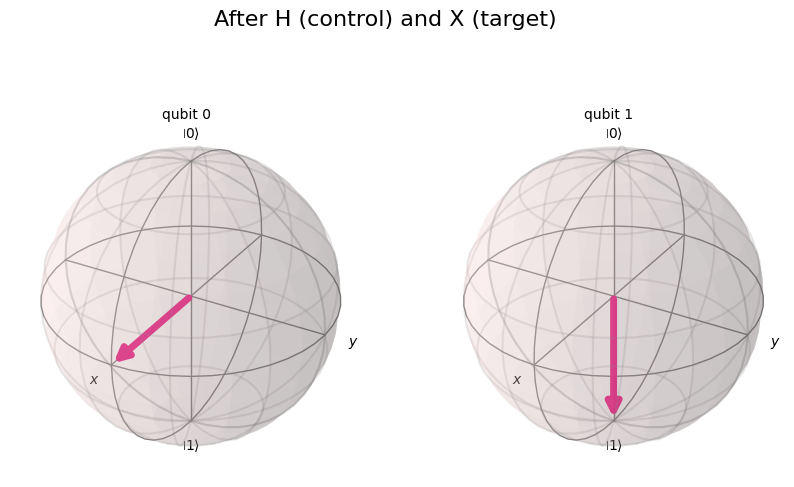

In [7]:
# Show qubit state on the Bloch sphere
plot_bloch_multivector(after_hx_state, title="After H (control) and X (target)");

### How Phase Kickback Happens

Before applying the `CRZ(θ)` gate, the combined state of the qubits is:

$$
|\psi⟩ = \frac{|0⟩|1⟩ + |1⟩|1⟩}{\sqrt{2}}
$$

---

**Applying `CRZ(θ)`**

- In the term $|0⟩|1⟩$:  
  ➤ Nothing happens, because the control is in $|0⟩$, and the controlled gate is not activated.

- In the term $|1⟩|1⟩$:  
  ➤ The gate **applies a phase**:  
  $$
  |1⟩|1⟩ \rightarrow e^{iθ}|1⟩|1⟩
  $$

---

**State After CRZ(θ):**

$$
|\psi⟩ = \frac{|0⟩ \otimes |1⟩ + e^{iθ}|1⟩ \otimes |1⟩}{\sqrt{2}}
$$

Factoring out the $|1⟩$ from the target qubit:

$$
|\psi⟩ = \left( \frac{|0⟩ + e^{iθ}|1⟩}{\sqrt{2}} \right) \otimes |1⟩
$$

---

**Final State:**

- **Control qubit (q₀):**
  $$
  \frac{|0⟩ + e^{iθ}|1⟩}{\sqrt{2}}
  $$
  ➤ The phase $(e^{i\theta})$ appeared in the control — this is the **kickback**!

- **Target qubit (q₁):**
  $$
  |1⟩
  $$
  ➤ Remains unchanged, since $|1⟩$ is an eigenstate of the **RZ(θ)** rotation.

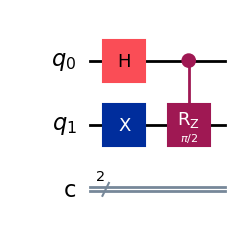

In [8]:
# ===============================================
# Apply CRZ(theta)
# ===============================================

# Define the phase angle for CRZ
theta = np.pi / 2  # set theta angle to 90 degrees (you can change this to explore different phase kickback effects)
qc.crz(theta, 0, 1)  # control on q0, target on q1

# Show the circuit
qc.draw('mpl');

In [9]:
# Get the statevector
final_state = Statevector.from_instruction(qc)

print("Final state after CRZ:")
print(final_state)

Final state after CRZ:
Statevector([0.        +0.j , 0.        +0.j , 0.70710678+0.j ,
             0.5       +0.5j],
            dims=(2, 2))


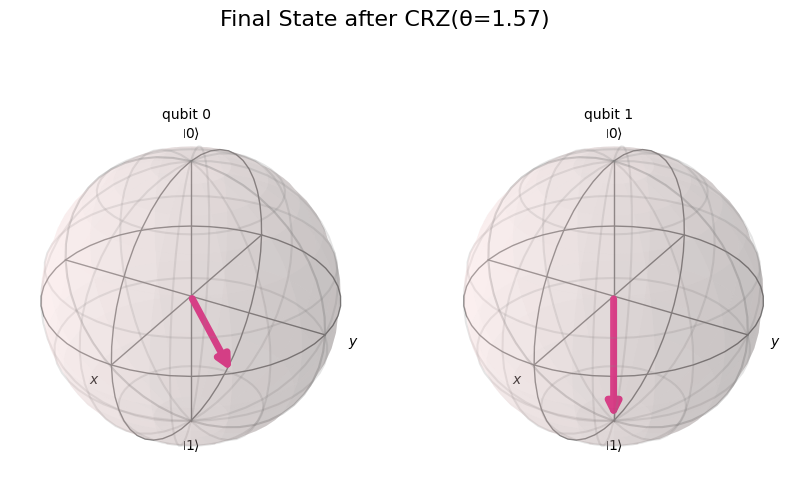

In [10]:
# Show qubit state on the Bloch sphere
plot_bloch_multivector(final_state, title=f"Final State after CRZ(θ={theta:.2f})");

### Final Result

$$
|\psi_{\text{final}}\rangle = \frac{|0\rangle + e^{i\theta}|1\rangle}{\sqrt{2}} \otimes |1\rangle
$$

The phase $(e^{i\theta})$ was **"reflected" on the control qubit** — even though it was applied to the target qubit — due to the **phase kickback**.

### Analysis of Probability Distributions with AerSimulator

The AerSimulator is a quantum circuit simulator provided by Qiskit, which is the simulation module of the Qiskit library (developed by IBM). It allows running quantum circuits in a simulated environment, i.e., without using a real quantum computer.

Now that we understand how **phase kickback** transfers the phase from the target qubit to the control qubit, let's simulate the complete circuit using `AerSimulator()`.

Our objectives are:

- To observe the **probability distribution** after the circuit, with and without the application of the second Hadamard.
- To see how the **introduced phase** affects the chance of measuring `|0⟩` or `|1⟩` on the control qubit.
- To confirm, in practice, that the final Hadamard is essential to **convert the invisible phase** into a **measurable** difference in probabilities.

This allows us to estimate the phase based on measurement statistics — the central principle of the **Quantum Phase Estimation (QPE) algorithm**.

Previous circuit with measurements:


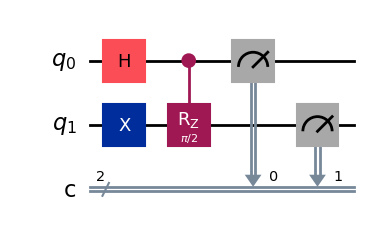

In [11]:
# Create a copy of the previous circuit
qc_measure = qc.copy()

# Add measurement to both qubits to get probabilities
qc_measure.measure([0, 1], [0, 1])

# Show the circuit
print("Previous circuit with measurements:")
qc_measure.draw('mpl');

Measurement results:


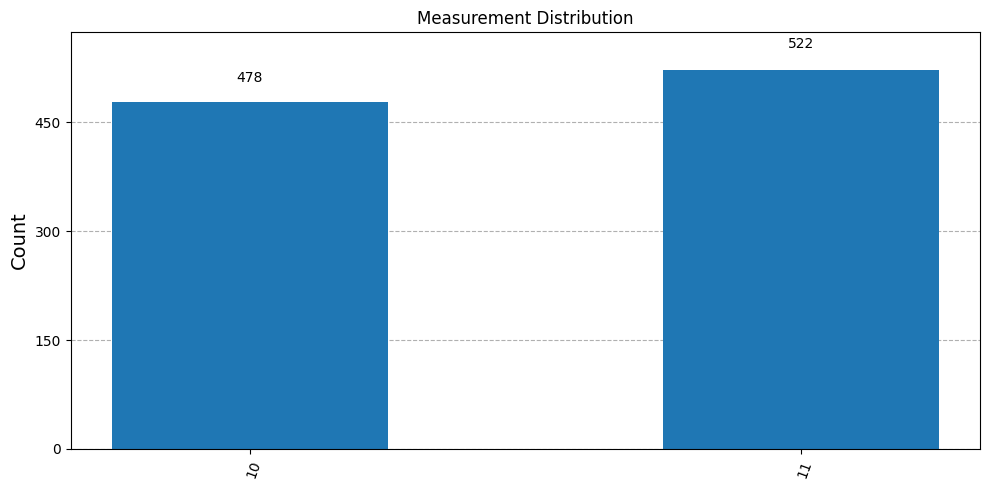

In [12]:
# ===============================================
# SIMULATE THE CIRCUIT
# ===============================================
# Set simulator
simulator = AerSimulator()

# Run the simulation
job = simulator.run(qc_measure, shots=1000)
result = job.result()
counts = result.get_counts()

# Plot measurement results
print("Measurement results:")
plot_histogram(counts, title="Measurement Distribution")
plt.show()

### Why Direct Measurements Don’t Reveal the Phase

After applying the `CRZ(θ)` gate, the control qubit is in the state:

$$
|\psi\rangle = \frac{1}{\sqrt{2}} \left( |0\rangle + e^{i\theta}|1\rangle \right)
$$

The phase $(e^{i\theta})$ **does not change the measurement probabilities**, since the magnitude of each component remains the same:

$$
P(0) = \left| \frac{1}{\sqrt{2}} \right|^2 = \frac{1}{2}
$$

$$
P(1) = \left| \frac{e^{i\theta}}{\sqrt{2}} \right|^2 = \frac{1}{2}
$$

In other words, the probabilities of measuring $(|0\rangle)$ or $(|1\rangle)$ are **equal**: 50% each.  
The phase is **hidden** in the quantum state and **cannot be observed directly** via classical measurement.

### How to Recover the Phase Information

Another Hadamard transforms **phase into amplitude**, and only then does the phase affect the **measurement probability**!

---

#### The Hadamard acts as follows

We know that:

- $H|0\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$  
- $H|1\rangle = \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)$

Thus:

$$
H|\psi\rangle = H\left( \frac{1}{\sqrt{2}} (|0\rangle + e^{i\theta}|1\rangle) \right)
$$

Distributing:

$$
H|\psi\rangle = \frac{1}{\sqrt{2}} \left[
\frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) + e^{i\theta} \cdot \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)
\right]
$$

Simplifying:

$$
H|\psi\rangle = \frac{1}{2} \left[ (1 + e^{i\theta})|0\rangle + (1 - e^{i\theta})|1\rangle \right]
$$

---

#### Probabilities after the Hadamard

- Probability to measure $|0\rangle$:

$$
P(0) = \left| \frac{1 + e^{i\theta}}{2} \right|^2 = \cos^2\left(\frac{\theta}{2}\right)
$$

- Probability to measure $|1\rangle$:

$$
P(1) = \left| \frac{1 - e^{i\theta}}{2} \right|^2 = \sin^2\left(\frac{\theta}{2}\right)
$$

---

- Before the Hadamard: the phase $\theta$ **did not affect the measurement**.
- After the Hadamard: the phase $\theta$ **directly changes the probability** of measuring $|0\rangle$ or $|1\rangle$.

This is the trick behind **phase kickback** and the **phase estimation algorithm**.

Previous circuit added Hadamard gate on qubit 0:


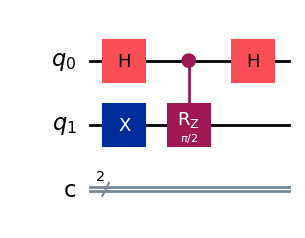

In [13]:
# Create a copy of the previous circuit
qc_h_measure = qc.copy()

# Add Hadamard to the control qubit to convert phase into amplitude
qc_h_measure.h(0)

# Show the circuit
print("Previous circuit added Hadamard gate on qubit 0:")
qc_h_measure.draw('mpl');

In [14]:
# Get the statevector
statevector = Statevector.from_instruction(qc_h_measure)

print("Final state after last H:")
print(statevector)

Final state after last H:
Statevector([0.        +0.j        , 0.        +0.j        ,
             0.85355339+0.35355339j, 0.14644661-0.35355339j],
            dims=(2, 2))


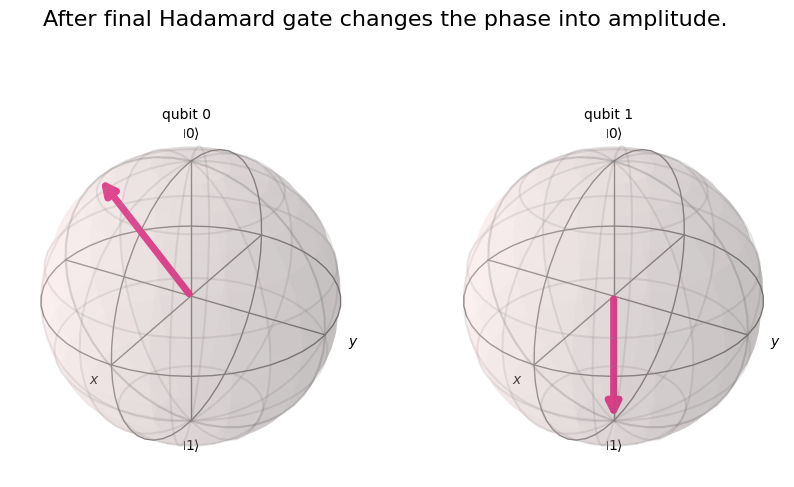

In [15]:
# Show qubit state on the Bloch sphere
plot_bloch_multivector(statevector, title="After final Hadamard gate changes the phase into amplitude.");

Previous circuit with measurements:


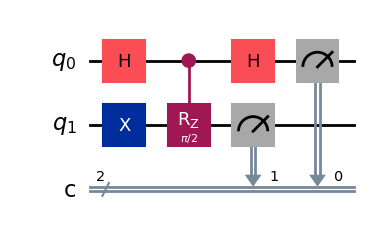

In [16]:
# Add measurement to both qubits to get probabilities
qc_h_measure.measure([0, 1], [0, 1])

# Show the circuit
print("Previous circuit with measurements:")
qc_h_measure.draw('mpl');

Measurement results:


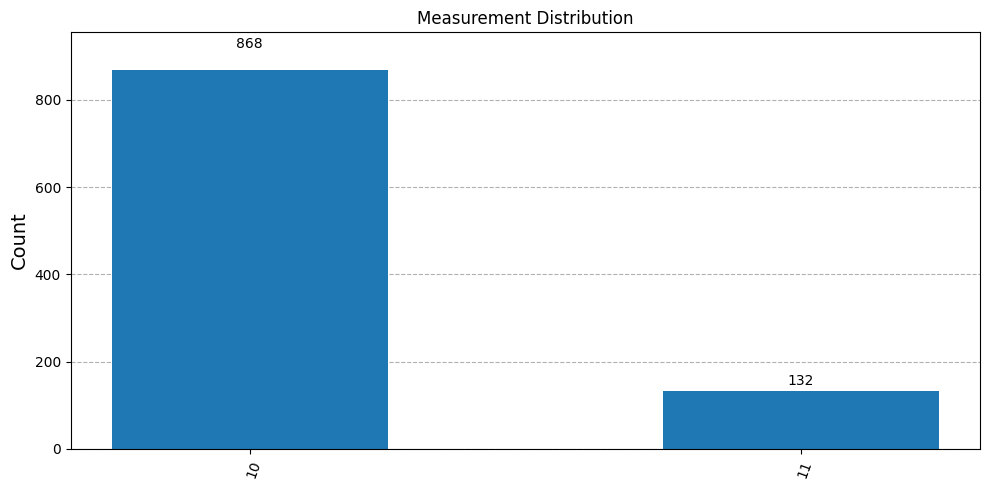

In [17]:
# ===============================================
# SIMULATE THE CIRCUIT
# ===============================================
# Set simulator
simulator = AerSimulator()

# Run the simulation
job = simulator.run(qc_h_measure, shots=1000)
result = job.result()
counts = result.get_counts()

# Plot measurement results
print("Measurement results:")
plot_histogram(counts, title="Measurement Distribution")
plt.show()

## Conclusion

As we have seen, when applying a CRZ(θ) with the control qubit in superposition, the control qubit "absorbs" the phase applied to the target. This demonstrates the phase kickback phenomenon.

Applying a final Hadamard on the control allows this phase to be observed as a difference in probability between the states |0⟩ and |1⟩.

This behavior is essential in algorithms such as QPE and Shor's algorithm, where the phase needs to be precisely extracted from the system.

## Additional Information

**Created by:** Diego Saran  
**Version:** 1.0   
**Based on:** Concepts from Quantum Computing with Qiskit       
**License:** MIT 
**Date:** July 2025

In [ ]:
import qiskit
import qiskit_ibm_runtime

print(f'Qiskit: {qiskit.__version__}')
print(f'Qiskit IBM Runtime: {qiskit_ibm_runtime.__version__}')